### Dataset Overview
Before jumping into the data exploration stage, let's take a moment to get a high-level overview of the dataset. 

In [208]:
#!/usr/bin/python3 -m pip install --upgrade pip
#!/usr/bin/python3 -m pip install --upgrade seaborn==0.11

In [209]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

%matplotlib inline
style.use('seaborn-whitegrid')

In [210]:
print(pd.__version__)
print(sns.__version__)
print(style.available)

0.25.0
0.11.0
['fast', 'seaborn-white', 'seaborn-darkgrid', 'seaborn-colorblind', 'seaborn', 'classic', 'Solarize_Light2', 'seaborn-dark-palette', 'seaborn-talk', 'fivethirtyeight', 'seaborn-whitegrid', 'seaborn-paper', 'tableau-colorblind10', 'grayscale', 'dark_background', '_classic_test', 'seaborn-notebook', 'seaborn-dark', 'seaborn-poster', 'seaborn-pastel', 'seaborn-ticks', 'seaborn-deep', 'ggplot', 'seaborn-muted', 'seaborn-bright', 'bmh']


In [211]:
# Load clean credit card data
creditcards = pd.read_csv('../datasets/crx.data_clean.csv', index_col=[0])
creditcards.head(5)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefaulter,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [212]:
# high-level overview of the dataset
print(creditcards.shape)
print(creditcards.info())

(690, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null object
Age               690 non-null float64
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefaulter    690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null int64
Income            690 non-null int64
Approved          690 non-null object
dtypes: float64(3), int64(3), object(10)
memory usage: 91.6+ KB
None


In [213]:
creditcards.describe(include='all')

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefaulter,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
count,690,690.000000,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690.000000,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,480,NaN,NaN,525,525,146,408,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.558623,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,180.547826,1017.385507,NaN
std,NaN,11.853490,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.970323,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.670000,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,60.000000,0.000000,NaN
50%,NaN,28.625000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,37.707500,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,272.000000,395.500000,NaN


There are 6 numerical and 10 categorical variables in the dataset. 

In [245]:
# List only the col.names with datatype specified.
def display_attributenames_datatype(df, icoltype=None, ecoltype=None):
    """
        Returns a list of column names in the DAtaFrame with coltype datatype.
    """
    print(' Displaying attribute names of datatype:',icoltype)
    if icoltype is not None:
        for icol,colname in enumerate(df.select_dtypes(include=icoltype).columns):
            print(' {} {}'.format(icol, colname))
    elif ecoltype is not None:
        for icol,colname in enumerate(df.select_dtypes(exclude=ecoltype).columns):
            print(' {} {}'.format(icol, colname))

In [239]:
# List of colnames which are object datatypes
display_attributenames_datatype(creditcards, 'object', None)

 Displaying attribute names of datatype: object
 0 Gender
 1 Married
 2 BankCustomer
 3 EducationLevel
 4 Ethnicity
 5 PriorDefaulter
 6 Employed
 7 DriversLicense
 8 Citizen
 9 Approved


***

### Univariate Analysis

Basic visualization tools for single variable or univariate analysis are:

`Bar Chart` - Nominal and small Ordinal Categorical Data

`Line Chart`- Ordinal Categorical and Interval Data

`Area Chart`- Ordinal Categorical and Interval Data

`Histogram` - Interval Data

In [216]:
# Univariate Analysis: Function to create bar plot
def univariate_bar(df, colname, colorid=0):
    """
        Returns a bar plot with with automatic labeling 
    """
    if colname in list(df.columns):
       
        # Set figure size 
        fig, ax = plt.subplots(figsize=(8,6))
    
        # set colorid for bar plot
        base_color = sns.color_palette()[colorid]

        # variable counts to calculate percentage
        cdict_count = df[colname].value_counts().to_dict() 
        total_count = df.shape[0]
        
        
        if (len(list(cdict_count.keys())) > 5):
            # max.count to position the %
            maxcount_pct= np.max(list(cdict_count.values()))*0.125
            # max. no. of categories Vs % rotation 
            rottext_pct = 90        
            # font size for % display
            fontsiz_pct = 12
        else:
            # max.count to position the %
            maxcount_pct= np.max(list(cdict_count.values()))*0.075
            # max. no. of categories Vs % rotation 
            rottext_pct = 0        
            # font size for % display
            fontsiz_pct = 16
                    
            
        # plotting...
        sns.countplot(data = df, x = colname
                               , order = list(cdict_count.keys())
                               , color = base_color
                               , saturation = 0.7)

        # title and labels
        plt.title('Order of '+ colname, fontsize=20)
        plt.xlabel(colname + ' Type', fontsize=16)
        plt.ylabel('Count', fontsize=16)
        
        # x-,y- ticks
        locs, labels = plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

        # display % count information on each tower of bar plot
        for loc, label in zip(locs, labels):
            count = cdict_count[label.get_text()]
            pct_string = '{:0.1f}%'.format(count*100/total_count)
            plt.text(loc, count-maxcount_pct, pct_string, ha='center', color='w', fontsize=fontsiz_pct, rotation=rottext_pct)

        return plt.show()

    else:
        
        print('  >>>Error:',colname,' is not in DataFrame')

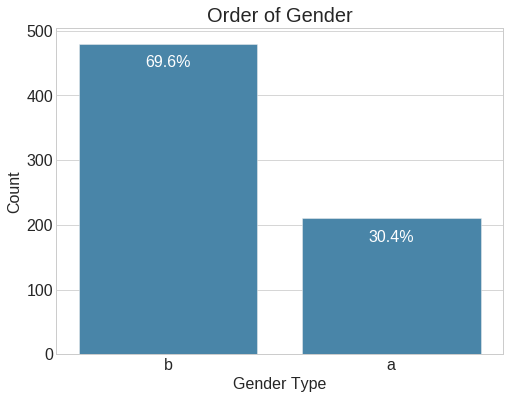

In [217]:
univariate_bar(creditcards, 'Gender', 1)

Above bar chart clearly shows that Gender Type **b** has more applications for a credit card ~ 70% of application

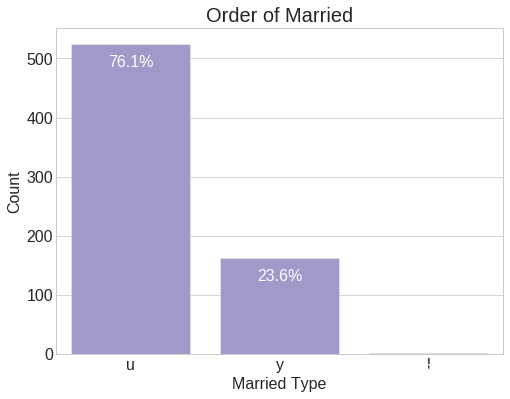

In [218]:
univariate_bar(creditcards, 'Married', 2)

76.1% of applicants are **u** type, followed by **y** and **i**.

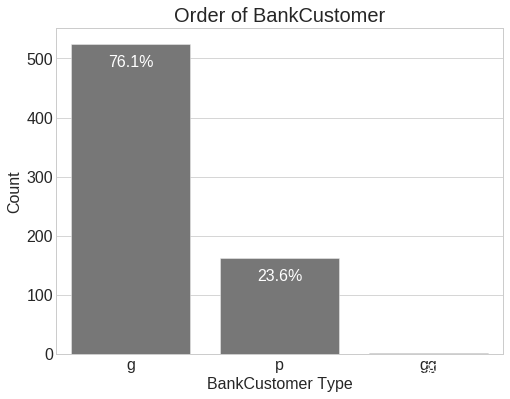

In [219]:
univariate_bar(creditcards, 'BankCustomer', 3)

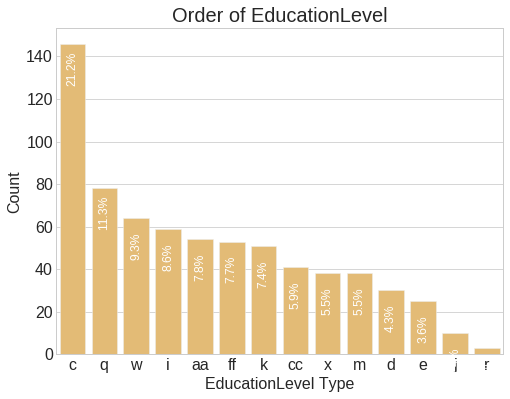

In [220]:
univariate_bar(creditcards, 'EducationLevel', 4)

Education Level of type 'c' are dominating the applications, followed by q, w, i, aa ..so on.

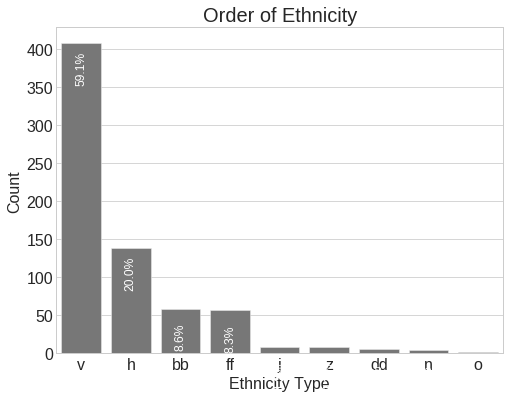

In [222]:
univariate_bar(creditcards, 'Ethnicity', 3)

Looks like ~60% of applicants belong to ethnic group 'v'.

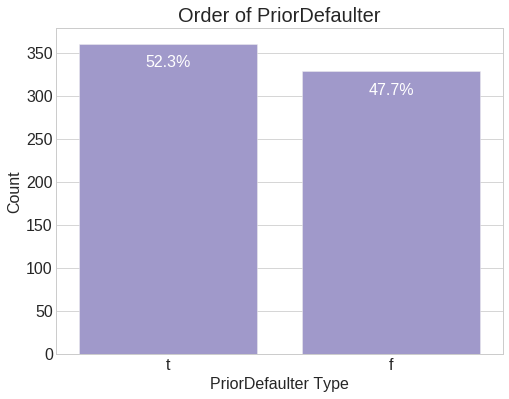

In [223]:
univariate_bar(creditcards, 'PriorDefaulter', 2)

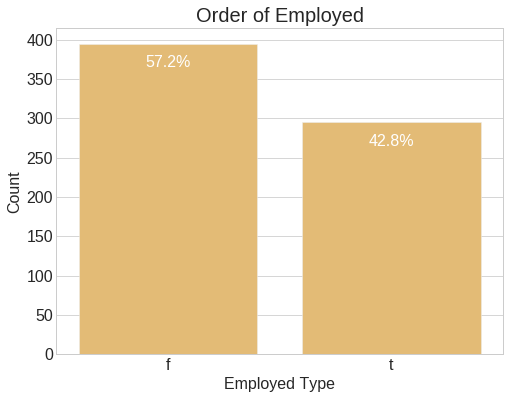

In [224]:
univariate_bar(creditcards, 'Employed', 4)

Employment aspect of applicants is almost equally distributed. 

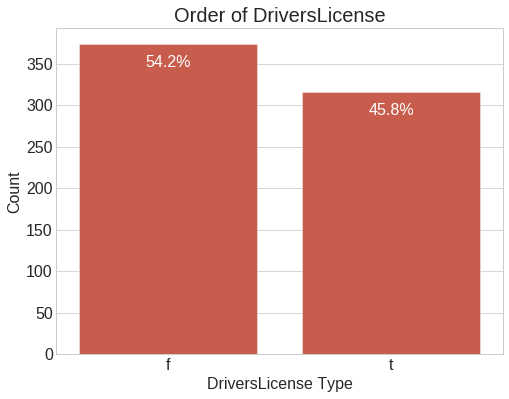

In [225]:
univariate_bar(creditcards, 'DriversLicense', 0)

Almost half of applicant's does not have a drivers license

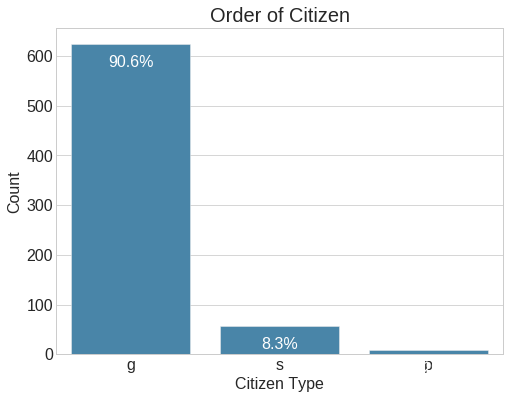

In [226]:
univariate_bar(creditcards, 'Citizen', 1)

Looks like applications are made mostly by Citizen type g.

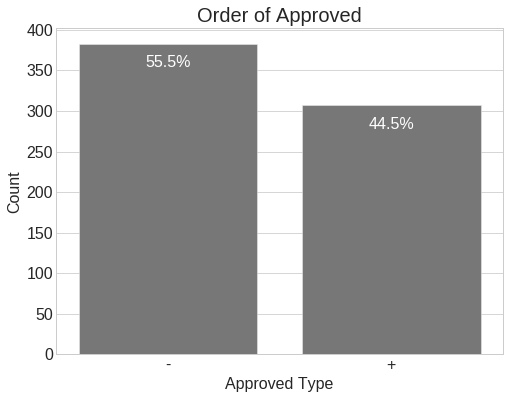

In [227]:
univariate_bar(creditcards, 'Approved', 3)

More than half the credit card applications are rejected. There might be several factors for rejection. Identifying some or all factors will give an applicant a headstart for his new application.

In [228]:
# Univariate Analysis: Function to create hist plot
def univariate_hist(df, colname, nbins='auto'):#, xlogflag=False, ylogflag=False):
    """
        Returns a line plot with with automatic labeling 
    """
    # Set figure size 
    fig, ax = plt.subplots(figsize=(8,6))

#     # Set x-log scale if xlogflag
#     if (xlogflag): ax.set_xscale('log')

#     # Set y-log scale if ylogflag
#     if (ylogflag): ax.set_yscale('log')        
        
    # plotting... histogram
    sns.histplot(ax = ax, data = df
                        , x = colname
                        , bins = nbins)
    
    #plt.legend(prop={'size': 12})
    plt.title('Distribution of '+colname, fontsize=20)
    plt.xlabel(colname+' (units)', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    return plt.show()

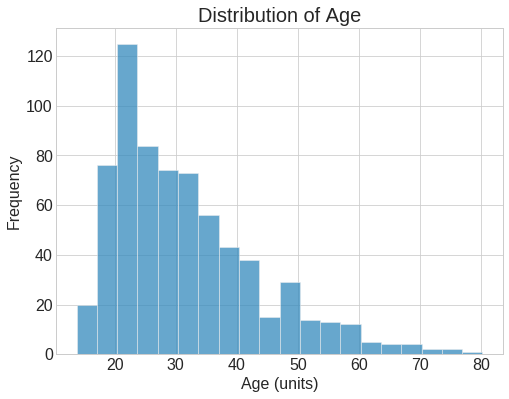

In [229]:
univariate_hist(creditcards, "Age")

Age of the applicants is unimodal and skewed towards right. 

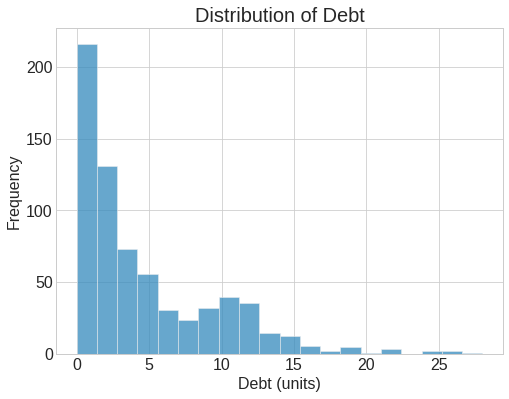

In [230]:
univariate_hist(creditcards, 'Debt')

Debt of applicants looks bimodal with two peaks one at 1 and other at 11.

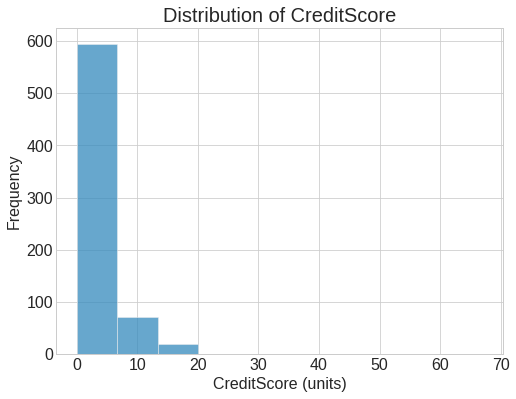

In [231]:
univariate_hist(creditcards, 'CreditScore', 10)

CreditScore is on the lower end for most of the applications. 

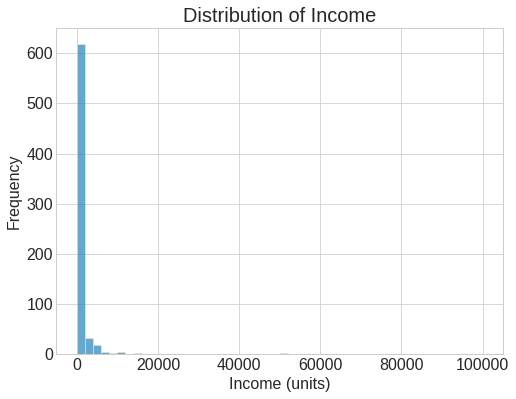

In [232]:
univariate_hist(creditcards, 'Income', 50)

Income of applicants is heavily skewed to right. It makes sense. People with lower incomes will mostly need the credit card to pay their monthly upfront costs. Most of applicants fall in the category with a monthly income < 10k.

***

### Bivariate Analysis

To understand the relationship between two attributes in the dataset, a bivariate analysis is performed using:
- `Scatter Plot` - Interval & Nominal Categorical data
- `Hex Plot` - Interval & Nominal Categorical data
- `Stacked bar chart` - Nominal & Ordinal Categorical data
- `Bivariate line chart` - Interval & Ordinal Categorical data

In [241]:
def bivariate_reg(df, xcolname, ycolname, xlogflag=False, ylogflag=False):
    """
        Returns a scatter plot with regression-trend line 
    """
    # set plot size
    fig, ax = plt.subplots(figsize=(8,6))
    
    # plotting... scatter+reg line
    sns.regplot(data = df, x = str(xcolname)
                         , y = str(ycolname)
                         , scatter_kws = {'alpha' : 1/3})
    
    # log scale or not
    if (ylogflag): plt.yscale('log')
    
    # title and labels
    plt.title(xcolname+' Vs '+ycolname, fontsize=20)
    plt.xlabel(xcolname+ ' (units)', fontsize=16)
    plt.ylabel(ycolname+ ' (units)', fontsize=16)
    
    return plt.show()

**Observation:**
Except few outliers, credit score shows an upward trend with age. The higher is the age of applicant, the higher is his/her Credit Score. 

In [246]:
# List of colnames which are not object datatypes
display_attributenames_datatype(creditcards, None, 'object')

 Displaying attribute names of datatype: None
 0 Age
 1 Debt
 2 YearsEmployed
 3 CreditScore
 4 ZipCode
 5 Income


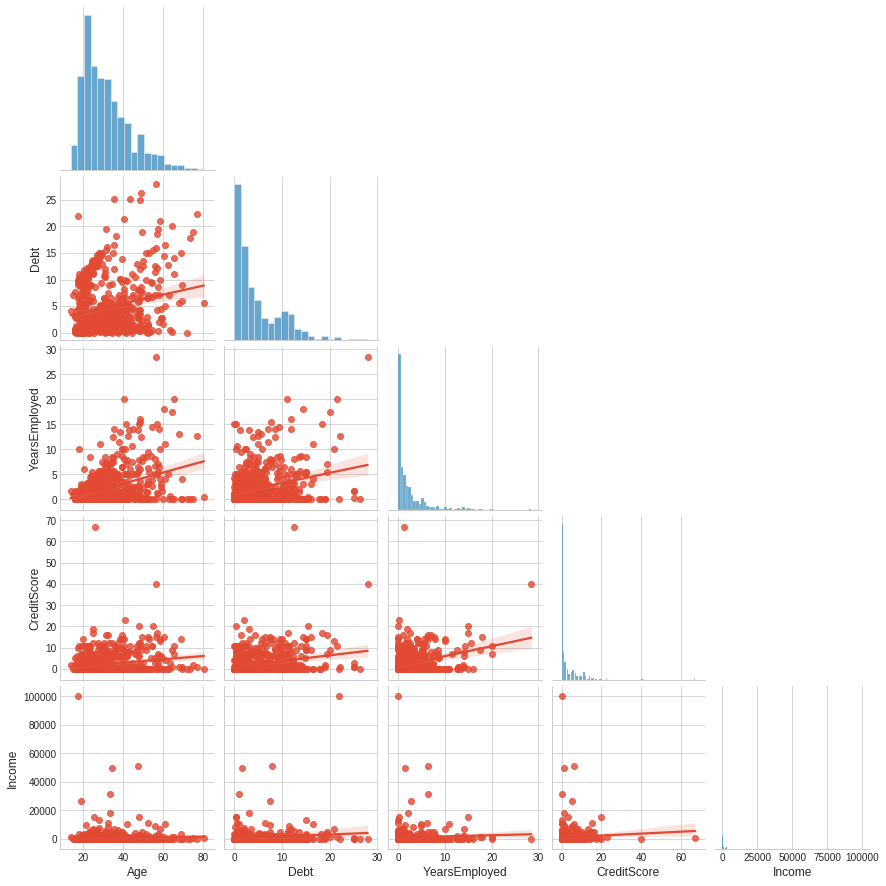

In [249]:
sns.pairplot(creditcards[['Age','Debt','YearsEmployed','CreditScore','Income']], kind='reg', corner=True);

**Observations:** 
1. Pairplot with regression line gives us an idea about the relationship between two numerical variables.
2. As a very first observation, histograms of all attributes are heavily skewed towards right. To detail them individually:
    - Credit card applications are placed mostly by younger people who are in the age range 20-40.
    - Debt of applicants is smaller and shouldn't be a worrying factor. 
    - Credit Card applications are mostly made by applicants who are in early stages of their professional careers.
    - Credit Score for most of the applicants is on the lower side. 
    - Ofcourse, income too is on the lower side for most of the applications. 
3. Debt of an applicant is observed to increase with age, which is a worrying trend in concerning credit card applications. 
4. Years Employed scales linearly with CreditScore and Income but with different slopes.

In [250]:
# List of colnames which are object datatypes
display_attributenames_datatype(creditcards, 'object', None)

 Displaying attribute names of datatype: object
 0 Gender
 1 Married
 2 BankCustomer
 3 EducationLevel
 4 Ethnicity
 5 PriorDefaulter
 6 Employed
 7 DriversLicense
 8 Citizen
 9 Approved


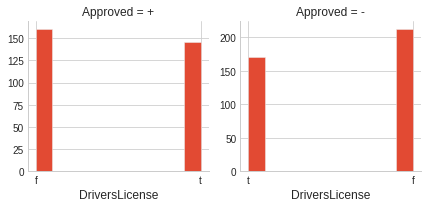

In [264]:
g = sns.FacetGrid(data=creditcards, col='Approved', col_wrap=3, sharex=False, sharey=False)
g.map(plt.hist, 'DriversLicense')

In [198]:
def bivariate_box(df, xcolname, ycolname):
    """
        Returns a box plot
    """
    # set plot size
    fig, ax = plt.subplots(figsize=(8,6))
    
    # plotting... box
    sns.boxplot(ax=ax, data = df
                     , x = str(xcolname)
                     , y = str(ycolname)
                     , color = sns.color_palette()[0]);
    
    
    # title and labels
    plt.title(xcolname+' Vs '+ycolname, fontsize=20)
    plt.xlabel(xcolname+ ' (units)', fontsize=16)
    plt.ylabel(ycolname+ ' (units)', fontsize=16)
    
    return plt.show()

In [199]:
def bivariate_violin(df, xcolname, ycolname):
    """
        Returns a violin plot
    """
    # set plot size
    fig, ax = plt.subplots(figsize=(8,6))
    
    # plotting... box+kde
    sns.violinplot(ax=ax, data = df
                        , x = str(xcolname)
                        , y = str(ycolname)
                        , color = sns.color_palette()[0]);
    
    
    # title and labels
    plt.title(xcolname+' Vs '+ycolname, fontsize=20)
    plt.xlabel(xcolname+ ' (units)', fontsize=16)
    plt.ylabel(ycolname+ ' (units)', fontsize=16)
    
    return plt.show()

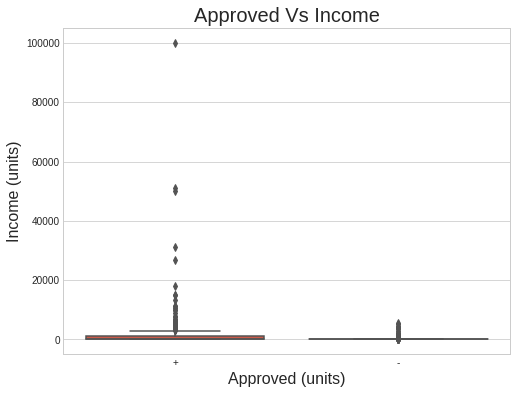

In [205]:
bivariate_box(creditcards, 'Approved', 'Income')

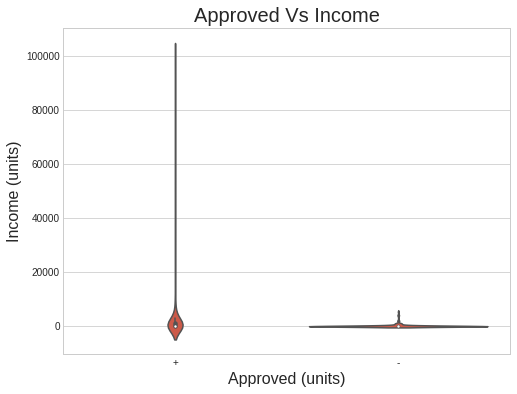

In [206]:
bivariate_violin(creditcards, 'Approved', 'Income')

In [173]:
def bivariate_joint(df, xcolname, ycolname, kindname='hist', xlogflag=False, ylogflag=False):
    """
        Returns a scatter plot with regression-trend line 
    """
    # set plot size
    fig, ax = plt.subplots(figsize=(8,6))
    
    # plotting... jointplot
    sns.jointplot(ax = ax, data = df
                         , x = str(xcolname)
                         , y = str(ycolname)
                         , kind = kindname);
    
    # log scale or not
    if (ylogflag): plt.yscale('log')
        
    
    # title and labels
    plt.title(xcolname+' Vs '+ycolname, fontsize=20)
    plt.xlabel(xcolname+ ' (units)', fontsize=16)
    plt.ylabel(ycolname+ ' (units)', fontsize=16)
    
    return plt.show()

***

### Multivariate Analysis